In [1]:
import numpy as np
import h5py
num = 100
num - int(num)

0

In [12]:
int(5.9)

5

In [28]:
filename = '/sdf/group/neutrino/sfogarty/module0_files/charge_data/datalog_2021_04_04_00_41_40_CEST.h5'
#filename = '/sdf/group/neutrino/sfogarty/module0_files/Argon39/larnd-sim/larndsim_argon39_0002.h5'
file = h5py.File(filename)

In [29]:
packets = file['packets']

In [26]:
packets[0:5]

array([(0, 0, 0, 4, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (1, 0, 0, 6, 0, 0, 0, 0, 0, 0, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (0, 0, 0, 4, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (2, 0, 0, 6, 0, 0, 0, 0, 0, 0, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
       (0, 0, 0, 4, 0, 0, 0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)],
      dtype=[('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('downstream_marker', 'u1'), ('parity', 'u1'), ('valid_parity', 'u1'), ('channel_id', 'u1'), ('timestamp', '<u8'), ('dataword', 'u1'), ('trigger_type', 'u1'), ('local_fifo', 'u1'), ('shared_fifo', 'u1'), ('register_address', 'u1'), ('register_data', 'u1'), ('direction', 'u1'), ('local_fifo_events', 'u1'), ('shared_fifo_events', '<u2'), ('counter', '<u4'), ('fifo_diagnostics_enabled', 'u1'), ('first_packet', 'u1'), ('receipt_timestamp', '<u4')])

In [17]:
packets[6:10]

array([(2,  0,   0, 4, 0, 0, 0, 0, 1617489694,   0, 0, 0, 0,  0,   0, 0, 0, 0, 0, 0, 0,       0),
       (2, 18,  45, 0, 1, 1, 1, 0,    9013004, 104, 0, 0, 0,  0, 195, 0, 0, 0, 0, 0, 1, 9019544),
       (1,  0,   0, 4, 0, 0, 0, 0, 1617489694,   0, 0, 0, 0,  0,   0, 0, 0, 0, 0, 0, 0,       0),
       (1, 27, 106, 0, 1, 1, 1, 3,    9041301,  94, 0, 0, 0, 67, 101, 0, 0, 0, 0, 0, 1, 9046708)],
      dtype=[('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('downstream_marker', 'u1'), ('parity', 'u1'), ('valid_parity', 'u1'), ('channel_id', 'u1'), ('timestamp', '<u8'), ('dataword', 'u1'), ('trigger_type', 'u1'), ('local_fifo', 'u1'), ('shared_fifo', 'u1'), ('register_address', 'u1'), ('register_data', 'u1'), ('direction', 'u1'), ('local_fifo_events', 'u1'), ('shared_fifo_events', '<u2'), ('counter', '<u4'), ('fifo_diagnostics_enabled', 'u1'), ('first_packet', 'u1'), ('receipt_timestamp', '<u4')])

In [20]:
np.concatenate((packets[0:5],packets[6:10]))

array([(1,  0,   0, 4, 0, 0, 0,  0, 1617489694,   0, 0, 0, 0,   0,   0, 0, 0, 0, 0, 0, 0,       0),
       (1,  9,  24, 0, 1, 0, 1, 58,    9016837,  89, 0, 0, 0, 122, 129, 0, 0, 0, 0, 0, 1, 9021647),
       (2,  0,   0, 4, 0, 0, 0,  0, 1617489694,   0, 0, 0, 0,   0,   0, 0, 0, 0, 0, 0, 0,       0),
       (2, 25,  13, 0, 1, 0, 1,  0,    9016054,  85, 0, 0, 0, 128, 189, 0, 0, 0, 0, 0, 1, 9016917),
       (1,  0,   0, 4, 0, 0, 0,  0, 1617489694,   0, 0, 0, 0,   0,   0, 0, 0, 0, 0, 0, 0,       0),
       (2,  0,   0, 4, 0, 0, 0,  0, 1617489694,   0, 0, 0, 0,   0,   0, 0, 0, 0, 0, 0, 0,       0),
       (2, 18,  45, 0, 1, 1, 1,  0,    9013004, 104, 0, 0, 0,   0, 195, 0, 0, 0, 0, 0, 1, 9019544),
       (1,  0,   0, 4, 0, 0, 0,  0, 1617489694,   0, 0, 0, 0,   0,   0, 0, 0, 0, 0, 0, 0,       0),
       (1, 27, 106, 0, 1, 1, 1,  3,    9041301,  94, 0, 0, 0,  67, 101, 0, 0, 0, 0, 0, 1, 9046708)],
      dtype=[('io_group', 'u1'), ('io_channel', 'u1'), ('chip_id', 'u1'), ('packet_type', 'u1'), ('

In [31]:
np.where((packets['packet_type'] == 6) &  (packets['trigger_type'] == 83))

(array([    3096,    84457,   305038,   305059,   437391,   437497,
          587752,   587754,   702858,   702912,   964226,   964276,
         1067810,  1067812,  1243380,  1243382,  1386097,  1386099,
         1589772,  1589774,  1704745,  1704750,  1878302,  1878307,
         2026862,  2026985,  2217509,  2217511,  2343879,  2343881,
         2568122,  2568182,  2649022,  2649024,  2877795,  2877797,
         2992895,  2992897,  3150013,  3150015,  3282445,  3282487,
         3431565,  3431567,  3558353,  3558403,  3777242,  3777248,
         3883660,  3883693,  4042240,  4042242,  4148956,  4149003,
         4433882,  4433884,  4541319,  4541439,  4712567,  4712588,
         4812148,  4812156,  4972442,  4972464,  5127382,  5127408,
         5262146,  5262163,  5401191,  5401222,  5571673,  5571699,
         5706874,  5706935,  5880178,  5880204,  5979579,  5979603,
         6165461,  6165463,  6287195,  6287220,  6501154,  6501172,
         6635469,  6635492,  6782952,  6782971, 

In [2]:
filename = '/sdf/group/neutrino/sfogarty/module0_files/charge_data/datalog_2021_04_04_00_41_40_CEST_events.h5'
file_new = h5py.File(filename)
filename = '/sdf/group/neutrino/sfogarty/module0_files/charge_data/datalog_2021_04_04_00_41_40_CEST_events_old.h5'
file_old = h5py.File(filename)

In [6]:
file_new['small_clusters'][0:10]

array([(1, 10.75016392, 1442689.68173162, -192.879,   37.689, -304.31),
       (1,  1.27803539, 1442568.43473695,  232.785, -614.109,  304.31),
       (1, 20.93332963, 1444697.033698  , -184.011,  325.899, -304.31),
       (1, 22.26559617, 1442080.43531133,  170.709, -210.615,  304.31),
       (1, 15.59847048, 1446603.90606651, -152.973, -339.201, -304.31),
       (1, 38.86314282, 1444474.83249312,  232.785, -614.109,  304.31),
       (1, 13.31785377, 1446498.62648785, -139.671, -432.315, -304.31),
       (1, 32.6312438 , 1444136.1128918 ,    6.651, -126.369,  304.31),
       (1,  6.23128938, 1449146.45589097,   90.897,  481.089, -304.31),
       (1, 13.8052002 , 1444970.83190933,  272.691,  246.087,  304.31)],
      dtype=[('nhit', 'u1'), ('q', '<f8'), ('t', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [7]:
file_old['small_clusters'][0:10]

array([(1, 12.4047391 , 161071.61089531,   90.897, -241.653, -304.31),
       (1,  6.14251883, 161853.04776792,  303.729, -361.371, -304.31),
       (1, 59.77628849, 166459.58933208,  308.163, -352.503, -304.31),
       (1, 10.79035201, 170181.654436  , -117.501,   68.727, -304.31),
       (1, 16.9081291 , 170338.77380719,   86.463, -170.709, -304.31),
       (1, 15.1740825 , 170382.61363174,   77.595, -144.105, -304.31),
       (1,  5.35369263, 170640.21260081,  241.653,  250.521, -304.31),
       (1,  5.91858508, 172091.7267917 , -232.785, -339.201, -304.31),
       (1, 12.17050622, 175346.27376668, -228.351,  401.277, -304.31),
       (1,  9.26189409, 177035.52426919, -139.671,  268.257,  304.31)],
      dtype=[('nhit', 'u1'), ('q', '<f8'), ('t', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [4]:
file_old.keys()

<KeysViewHDF5 ['small_clusters']>

(array([1636., 1088.,  778.,  711.,  447.,  681.,  654.,  554.,  610.,
         411.,  540.,  531.,  519.,  412.,  489.,  492.,  486.,  403.,
         299.,  446.,  491.,  491.,  262.,  456.,  333.,  300.,  382.,
         256.,  437.,  407.,  433.,  321.,  402.,  437.,  440.,  429.,
         335.,  459.,  496.,  478.,  334.,  515.,  507., 8118.,  578.,
         421.,  714.,  865., 1796., 1980.]),
 array([-308.163  , -295.83648, -283.50996, -271.18344, -258.85692,
        -246.5304 , -234.20388, -221.87736, -209.55084, -197.22432,
        -184.8978 , -172.57128, -160.24476, -147.91824, -135.59172,
        -123.2652 , -110.93868,  -98.61216,  -86.28564,  -73.95912,
         -61.6326 ,  -49.30608,  -36.97956,  -24.65304,  -12.32652,
           0.     ,   12.32652,   24.65304,   36.97956,   49.30608,
          61.6326 ,   73.95912,   86.28564,   98.61216,  110.93868,
         123.2652 ,  135.59172,  147.91824,  160.24476,  172.57128,
         184.8978 ,  197.22432,  209.55084,  221.87736, 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
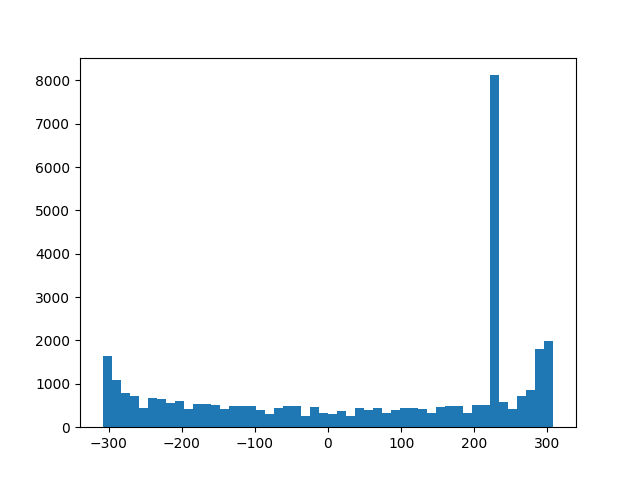

In [21]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.hist(file_new['small_clusters']['x'],bins=50)

(array([1864., 1223.,  847.,  802.,  491.,  773.,  722.,  611.,  651.,
         437.,  567.,  552.,  535.,  426.,  525.,  539.,  527.,  437.,
         328.,  466.,  504.,  525.,  276.,  484.,  348.,  385.,  502.,
         284.,  500.,  593.,  588.,  365.,  497.,  499.,  489.,  496.,
         385.,  541.,  558.,  575.,  373.,  660.,  635., 9873.,  917.,
         559., 1097., 2113., 5567., 6524.]),
 array([-308.163  , -295.83648, -283.50996, -271.18344, -258.85692,
        -246.5304 , -234.20388, -221.87736, -209.55084, -197.22432,
        -184.8978 , -172.57128, -160.24476, -147.91824, -135.59172,
        -123.2652 , -110.93868,  -98.61216,  -86.28564,  -73.95912,
         -61.6326 ,  -49.30608,  -36.97956,  -24.65304,  -12.32652,
           0.     ,   12.32652,   24.65304,   36.97956,   49.30608,
          61.6326 ,   73.95912,   86.28564,   98.61216,  110.93868,
         123.2652 ,  135.59172,  147.91824,  160.24476,  172.57128,
         184.8978 ,  197.22432,  209.55084,  221.87736, 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
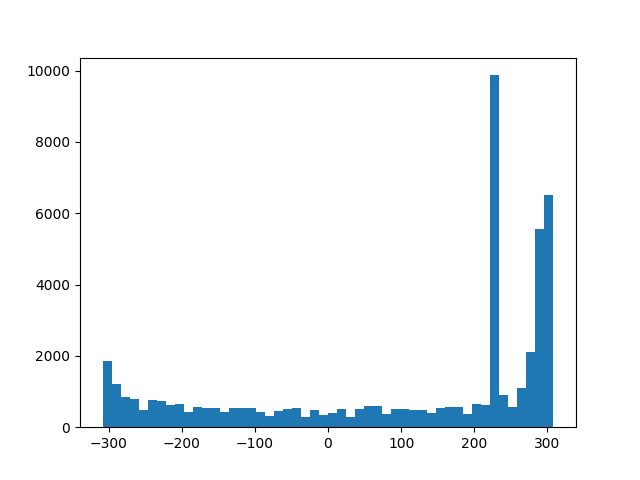

In [22]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.hist(file_old['small_clusters']['x'],bins=50)

In [24]:
import os
filename = '/sdf/group/neutrino/sfogarty/module0_files/charge_data/datalog_2021_04_04_00_41_40_CEST_events.h5'
os.path.exists(filename)

False